In [1]:
import jax.numpy as jnp
import jax.random as random_j

In [2]:
key = random_j.PRNGKey(42)
dtype = jnp.float32

normal_matrix = random_j.normal(key, shape=(10, 252 * 2))

In [3]:
normal_matrix = normal_matrix.reshape((10, 252, 2)).transpose(1, 0, 2)

In [4]:
means = jnp.asarray([0.1, 0.2], dtype)
sigmas = jnp.asarray([0.3, 0.2], dtype)
corr = jnp.asarray([[1, 0.3],
                    [0.3, 1]], dtype)

In [5]:
chol = jnp.linalg.cholesky(corr)

In [12]:
stochastic_increment = normal_matrix @ chol

In [10]:
dt = 1.0 / 252

In [13]:
log_increment = (means - sigmas**2 / 2) * dt + jnp.sqrt(
            dt
        ) * sigmas * stochastic_increment

In [48]:
log_increment

Array([[[-1.72012150e-02,  8.47959518e-03],
        [-2.00368091e-02, -5.13659371e-03],
        [ 7.73141626e-03,  1.82610899e-02],
        ...,
        [-1.16815418e-02,  3.19116050e-03],
        [-1.82517767e-02,  1.19172465e-02],
        [ 1.91657748e-02,  1.31413992e-02]],

       [[-4.65749651e-02,  2.39867298e-03],
        [ 3.28673646e-02,  2.21247636e-02],
        [-1.14936370e-03,  8.48032534e-03],
        ...,
        [ 2.47387495e-02,  1.44375339e-02],
        [-5.07387472e-03, -1.69138634e-03],
        [-3.01158205e-02, -2.00070324e-03]],

       [[-3.43031855e-03,  6.91076275e-03],
        [ 1.42641068e-02,  2.16449555e-02],
        [-1.10808751e-02, -1.58676133e-02],
        ...,
        [ 4.09304090e-02,  9.62230377e-03],
        [-9.24522523e-03, -1.69675685e-02],
        [ 2.35468913e-02,  1.79938078e-02]],

       ...,

       [[-2.06166413e-02,  1.93026417e-03],
        [-5.97096756e-02, -1.82178039e-02],
        [-1.85415614e-02,  1.20577384e-02],
        ...,
     

In [16]:
once = jnp.ones([252, 252], dtype)

In [22]:
jnp.tril(once, k=-1).shape

(252, 252)

In [21]:
log_increment.transpose().shape

(2, 10, 252)

In [23]:
cumsum = log_increment.transpose() @ jnp.tril(once, k=-1)

In [24]:
cumsum

Array([[[ 2.4534044e-01,  2.9191542e-01,  2.9534575e-01, ...,
          1.8027168e-02,  4.1417247e-03,  0.0000000e+00],
        [-2.9445946e-01, -3.2732683e-01, -3.4159094e-01, ...,
          9.8368200e-03,  1.4049555e-02,  0.0000000e+00],
        [ 6.7979701e-02,  6.9129065e-02,  8.0209933e-02, ...,
          4.1134290e-02,  2.6480831e-02,  0.0000000e+00],
        ...,
        [ 1.6484776e-01,  1.4010897e-01,  9.9178553e-02, ...,
         -3.6183972e-02,  3.0839301e-03,  0.0000000e+00],
        [ 2.8500788e-02,  3.3574693e-02,  4.2819910e-02, ...,
          1.8576436e-02,  1.5643190e-03,  0.0000000e+00],
        [ 4.3908578e-01,  4.6920156e-01,  4.4565469e-01, ...,
          1.5756816e-02,  1.6000431e-02,  0.0000000e+00]],

       [[ 7.7051789e-01,  7.6811922e-01,  7.6120847e-01, ...,
         -1.7748997e-02, -1.8709030e-02,  0.0000000e+00],
        [ 3.1226331e-01,  2.9013854e-01,  2.6849359e-01, ...,
          7.3590754e-03, -9.7070006e-05,  0.0000000e+00],
        [-2.3196526e-02, 

In [26]:
cumsum = cumsum.transpose((1, 2, 0))

In [52]:
samples = jnp.asarray([100, 100]) * jnp.exp(cumsum)

In [66]:
samples_ = samples.transpose(1, 0, 2)[::-1, :, :]

In [34]:
import matplotlib.pyplot as plt

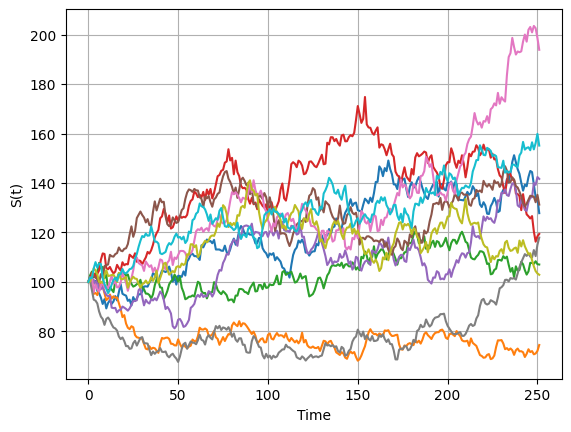

In [67]:
plt.plot(samples_[:, :, 0])
plt.ylabel('S(t)')
plt.xlabel('Time')
plt.grid()
plt.show()

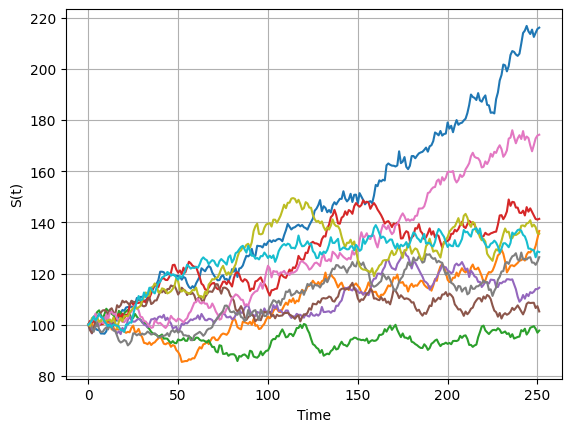

In [68]:
plt.plot(samples_[:, :, 1])
plt.ylabel('S(t)')
plt.xlabel('Time')
plt.grid()
plt.show()